In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

In [3]:
from Scripts import simulation_CLI as cleo

In [4]:
N = 8
num_chunks = 2
num_iterations = 5
measurments = [measure.mutual_information_of_every_pair]
measurments = [measure.relative_entropy_of_every_pair]

initial_pops = [.2 for _ in range(N)]
initial_pops[4] = .4


In [5]:
identity = DM.Identity(DM.energy_basis(4))

In [4]:
for unitary_seed in range(100):
    initial_pops = [.2, .2, .2, .2, .4, .2, .2, .2]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c6"
    unitary_energy_subspace = None
    ordering_seed = 1
    chunk_size = 4
    order_rule_name = "greedy"
    num_steps = 50
    data = cleo.execute(file_name="greedy",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="unitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_0-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_0-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_1-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_1-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_2-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_2-order_rul

In [5]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

In [ ]:
for unitary_seed in range(100):
    initial_pops = [.2, .2, .2, .2, .4, .2, .2, .2]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c6"
    unitary_energy_subspace = None
    ordering_seed = 1
    chunk_size = 4
    order_rule_name = "random"
    num_steps = 50
    data = cleo.execute(file_name="random",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="unitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

In [ ]:
data

In [ ]:
pops_list=list(data[0].values())
pops_list_list=[]
for i in range(99):
    pops_list_list.append(list(pops_list[i].values()))
pops_list_list

In [11]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [12]:
newdata1 = dict(h5py.File("../data/greedy/greedy.hdf5"))

In [ ]:
newdata2 =  dict(h5py.File("../data/random/random.hdf5"))

In [15]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace None']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace None'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace None']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace None'][f'unitary seed {seed}'][f'order rule name {update_rule}']['two_qubit_dms'])
        dat = {int(k):dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [16]:
popsgreedy = get_pops(newdata1,8,"c6","greedy")

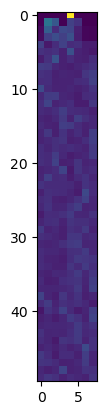

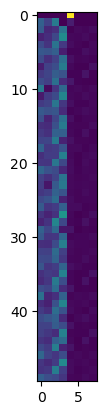

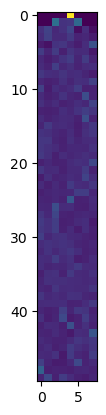

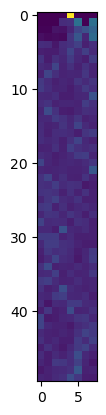

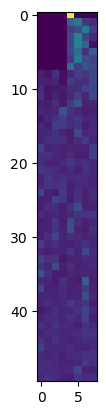

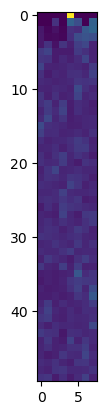

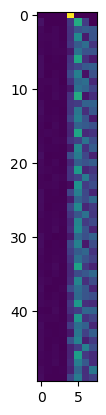

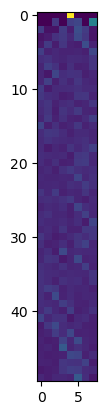

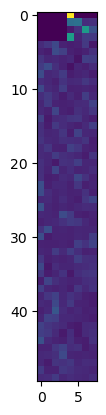

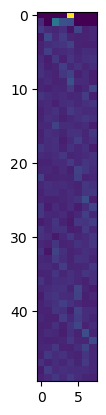

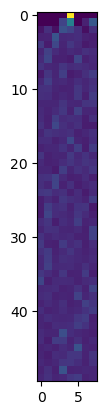

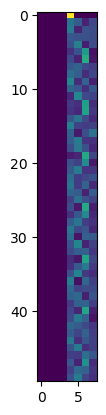

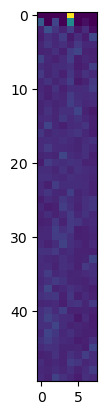

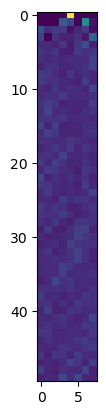

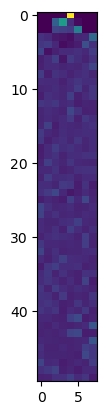

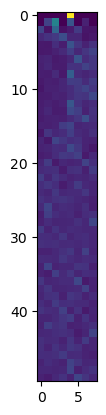

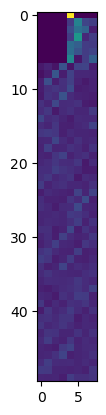

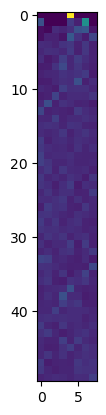

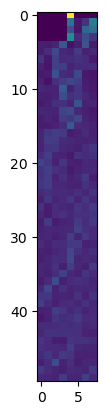

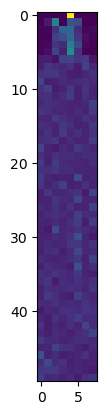

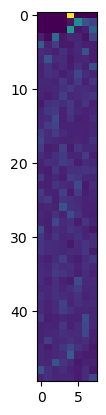

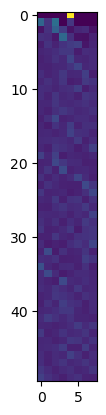

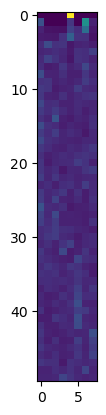

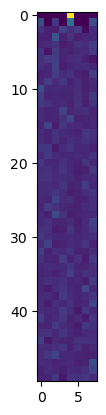

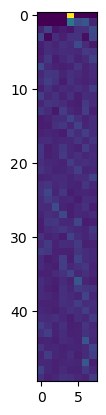

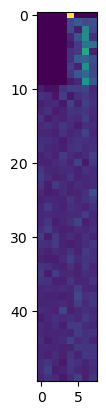

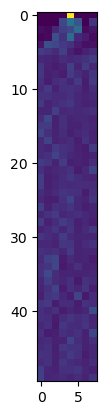

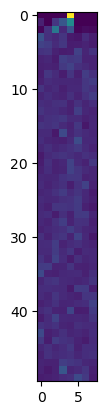

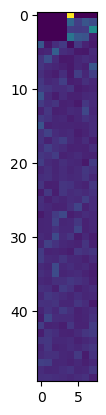

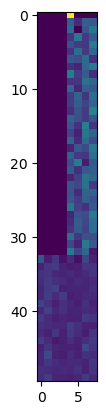

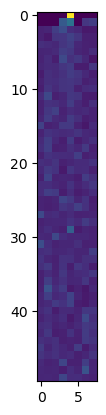

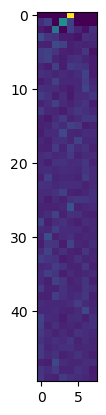

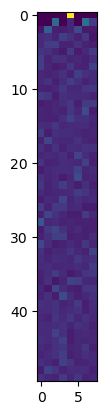

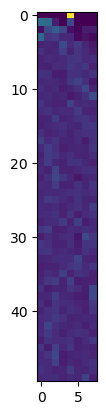

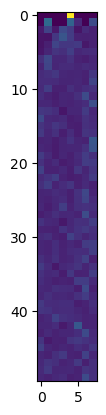

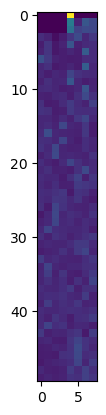

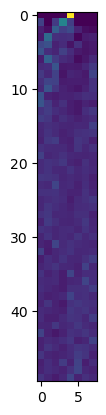

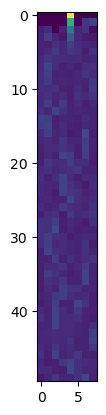

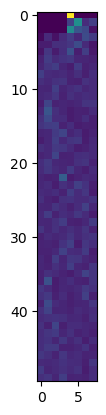

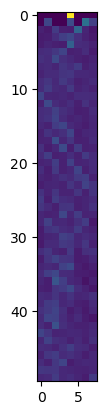

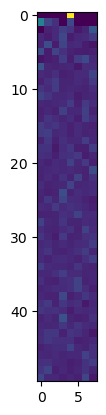

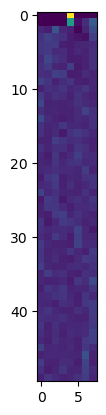

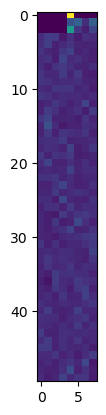

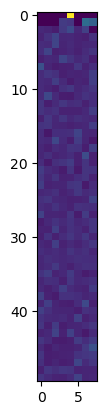

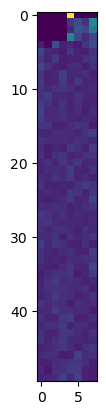

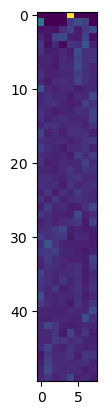

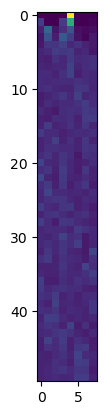

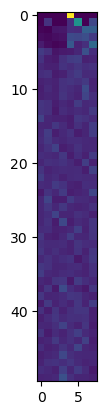

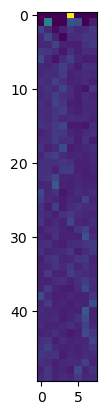

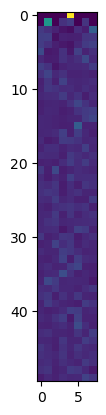

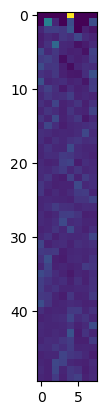

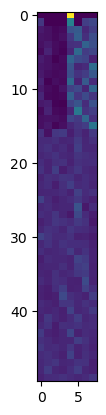

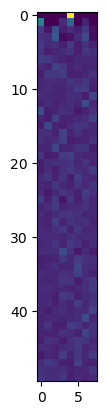

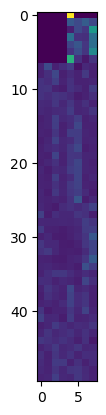

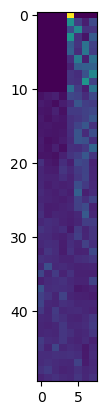

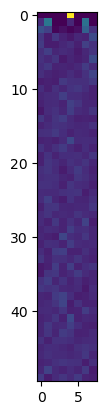

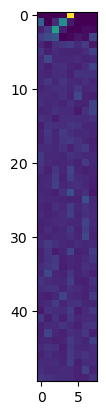

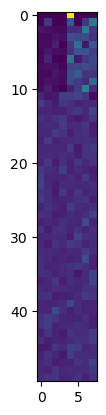

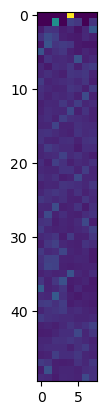

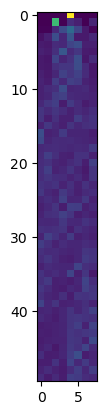

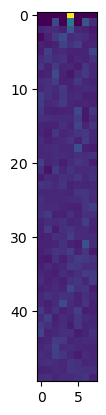

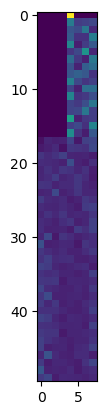

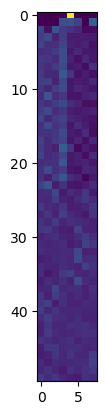

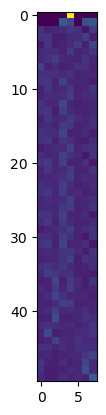

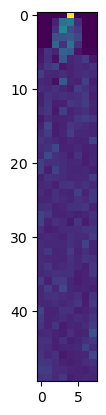

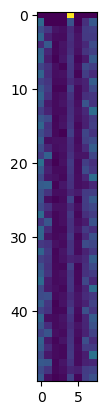

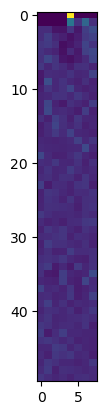

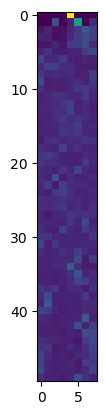

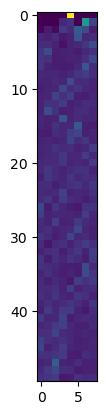

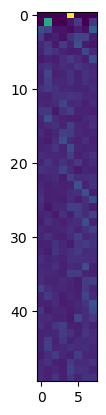

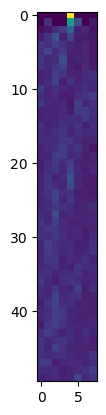

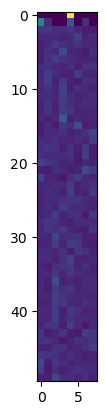

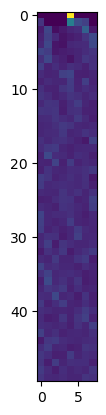

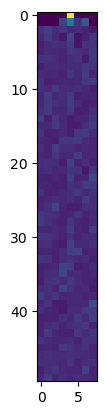

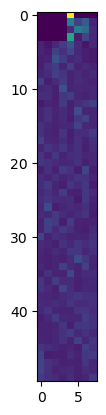

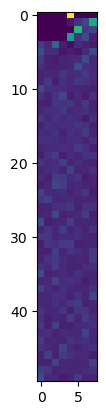

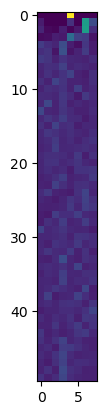

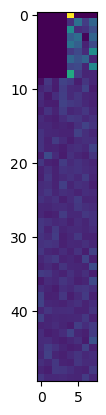

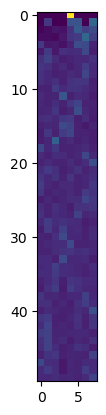

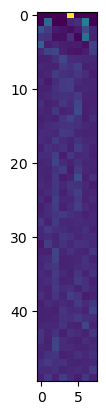

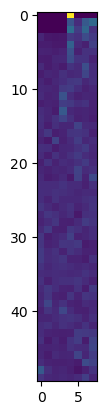

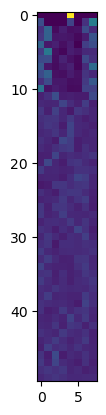

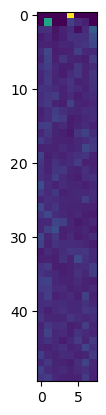

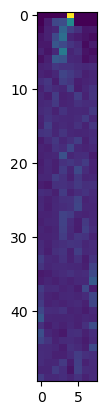

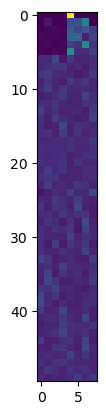

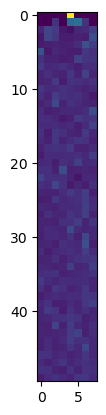

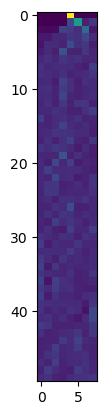

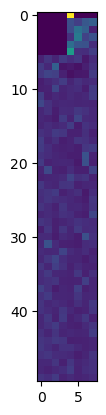

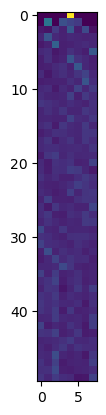

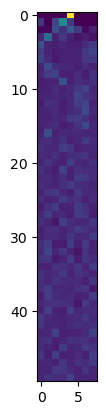

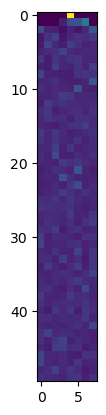

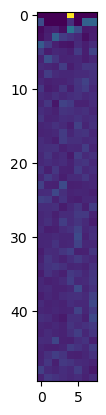

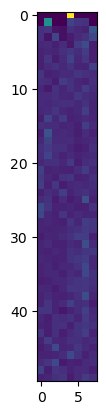

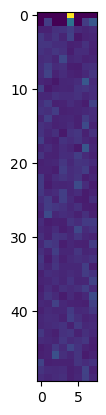

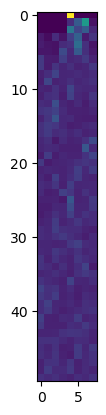

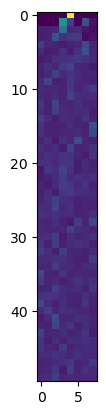

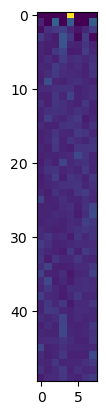

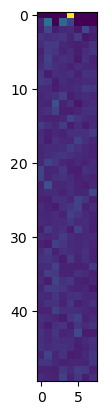

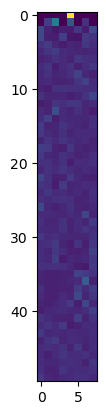

In [17]:
for i in range(99):
    plt.imshow(popsgreedy[i], interpolation='none')
    plt.show()

In [ ]:
for i in range(99):
    plt.imshow(popsgreedy[i], interpolation='none')
    plt.savefig(f'plotnumgreedy_{i}.png')   # save the figure to file
    plt.close() 

In [ ]:
popsrandom =  get_pops(newdata2,8,"c6","random")

In [ ]:
for i in range(99):
    plt.imshow(popsrandom[i], interpolation='none')
    plt.show()

In [ ]:
for i in range(99):
    plt.imshow(popsrandom[i], interpolation='none')
    plt.savefig(f'plotnumrandom_{i}.png')   # save the figure to file
    plt.close() 

In [43]:
sizes = [8]
connectivities = ["c6"]
temps = ['cold','hot']
result = {s:{t:{} for t in temps} for s in sizes}
for size in sizes:
    for connectivity in connectivities:
        pops = get_pops(newdata1,size,connectivity,"greedy")
        extractable_work = np.array([[measure.extractable_work_of_each_qubit_from_pops(p) for p in time_slice ]for time_slice in pops ])
        change_in_ex_work = np.diff(extractable_work,axis = 1)
        hot__percent_greater_0 = np.mean(change_in_ex_work[:,:,(4)]>0,axis = 1).flatten()
        cold_percent_greater_0 = np.mean(change_in_ex_work[:,:,(1,2,3,5,6,7)]>0,axis = 1).flatten()
        result[size]['hot'][connectivity] = hot__percent_greater_0
        result[size]['cold'][connectivity] = cold_percent_greater_0

In [44]:
result

{8: {'cold': {'c6': array([0.46938776, 0.44897959, 0.53061224, 0.53061224, 0.51020408,
          0.44897959, 0.42857143, 0.48979592, 0.48979592, 0.42857143,
          0.48979592, 0.53061224, 0.46938776, 0.51020408, 0.48979592,
          0.42857143, 0.48979592, 0.48979592, 0.53061224, 0.44897959,
          0.48979592, 0.53061224, 0.55102041, 0.57142857, 0.46938776,
          0.44897959, 0.53061224, 0.55102041, 0.51020408, 0.44897959,
          0.53061224, 0.42857143, 0.46938776, 0.51020408, 0.46938776,
          0.42857143, 0.53061224, 0.44897959, 0.48979592, 0.46938776,
          0.51020408, 0.51020408, 0.44897959, 0.46938776, 0.53061224,
          0.44897959, 0.44897959, 0.57142857, 0.42857143, 0.55102041,
          0.48979592, 0.53061224, 0.51020408, 0.46938776, 0.46938776,
          0.55102041, 0.55102041, 0.42857143, 0.42857143, 0.51020408,
          0.51020408, 0.44897959, 0.51020408, 0.44897959, 0.53061224,
          0.46938776, 0.53061224, 0.53061224, 0.53061224, 0.53061224,
   

In [ ]:
sizes = [8,12]
temps = ['cold','hot']
result = {s:{t:{} for t in temps} for s in sizes}
for size in sizes:
    for connectivity in data[f'{size} qubits']:
        print(f'{size} qubits {connectivity}')
        pops = get_pops(data,size,connectivity[:-13])
        extractable_work = np.array([[measure.extractable_work_of_each_qubit_from_pops(p) for p in time_slice ]for time_slice in pops ])
        change_in_ex_work = np.diff(extractable_work,axis = 1)
        hot__percent_greater_0 = np.mean(change_in_ex_work[:,:,(0,4)]>0,axis = 1).flatten()
        cold_percent_greater_0 = np.mean(change_in_ex_work[:,:,(1,2,3,5,6,7)]>0,axis = 1).flatten()
        result[size]['hot'][connectivity] = hot__percent_greater_0
        result[size]['cold'][connectivity] = cold_percent_greater_0

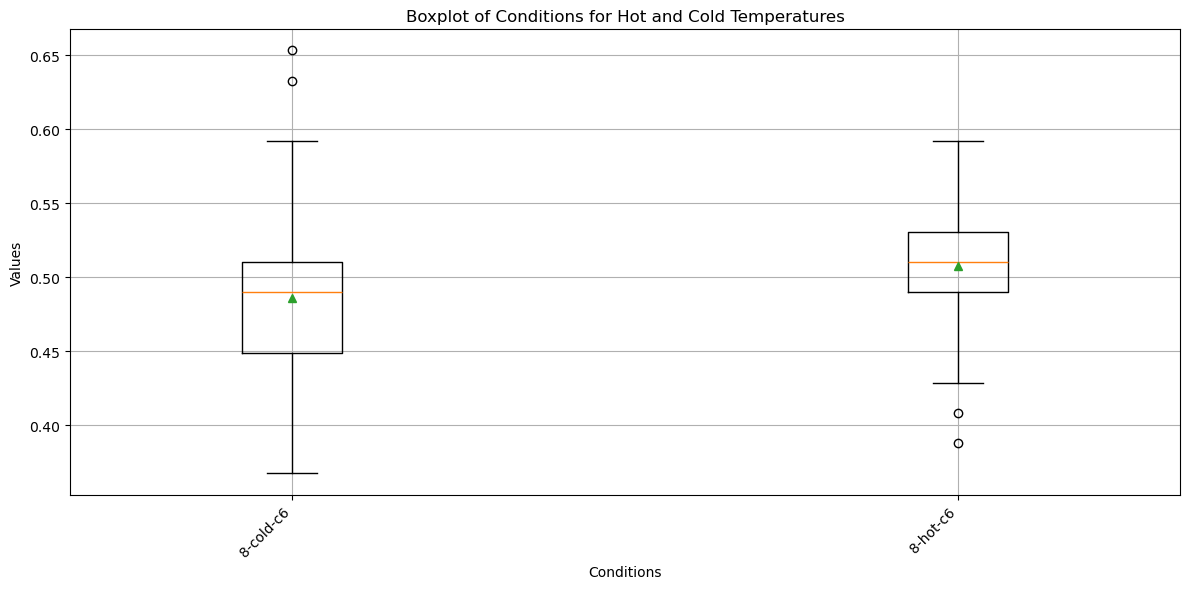

In [45]:
# Extracting data for plotting
labels = []
all_data = []
positions = []
num_subgroups = sum(len(inner_dict) for outer_dict in result.values() for inner_dict in outer_dict.values())

i,j,k=0,0,0
for outer_key, outer_value in result.items():
    i+=1
    for inner_key, inner_value in outer_value.items():
        j+=1
        for innermost_key, innermost_value in inner_value.items():
            k+=1
            labels.append(f"{outer_key}-{inner_key}-{innermost_key}")
            all_data.append(innermost_value)
            positions.append(1.2*i+.9*j+.6*k)

# Creating boxplot with custom positions
num_boxes = len(all_data)
num_outer_keys = len(result)
group_gap = 3  # adjust the gap between groups


plt.figure(figsize=(12, 6))
plt.boxplot(all_data, positions=positions, showmeans=True)

plt.xticks(positions, labels, rotation=45, ha='right')
plt.xlabel('Conditions')
plt.ylabel('Values')
plt.title('Boxplot of Conditions for Hot and Cold Temperatures')
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for /: 'dict' and 'int'

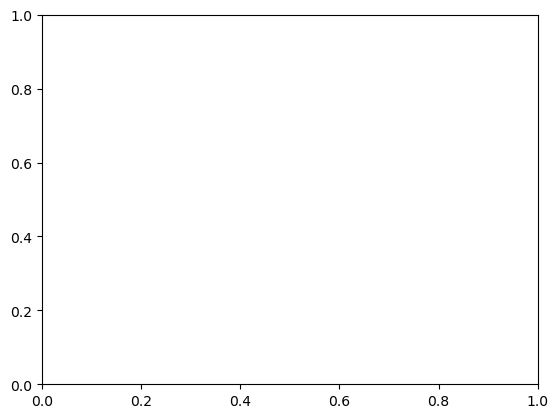

In [48]:

# Extracting data for box plot
hot_data = [result[key]['hot'] for key in result.keys()]
cold_data = [result[key]['cold'] for key in result.keys()]
labels = [f'{key} - Hot' for key in result.keys()] + [f'{key} - Cold' for key in result.keys()]



# Creating box plot
plt.boxplot(hot_data + cold_data, labels=labels)
plt.xlabel('Temperature')
plt.ylabel('Values')
plt.title('Box plot of Hot and Cold data')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



In [49]:
hot_data

[{'c6': array([0.46938776, 0.48979592, 0.51020408, 0.51020408, 0.57142857,
         0.46938776, 0.51020408, 0.42857143, 0.55102041, 0.42857143,
         0.55102041, 0.51020408, 0.53061224, 0.57142857, 0.46938776,
         0.51020408, 0.44897959, 0.55102041, 0.48979592, 0.44897959,
         0.53061224, 0.55102041, 0.46938776, 0.48979592, 0.44897959,
         0.55102041, 0.55102041, 0.42857143, 0.42857143, 0.55102041,
         0.57142857, 0.48979592, 0.48979592, 0.44897959, 0.48979592,
         0.55102041, 0.51020408, 0.59183673, 0.53061224, 0.46938776,
         0.44897959, 0.46938776, 0.53061224, 0.53061224, 0.51020408,
         0.44897959, 0.51020408, 0.48979592, 0.3877551 , 0.53061224,
         0.51020408, 0.55102041, 0.53061224, 0.55102041, 0.53061224,
         0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.46938776,
         0.51020408, 0.53061224, 0.51020408, 0.53061224, 0.48979592,
         0.55102041, 0.55102041, 0.48979592, 0.48979592, 0.53061224,
         0.53061224, 0.46938

In [ ]:
for time_index in two_qubit_dms_example:
    G = nx.Graph()
    processed_data = {}
    for key in two_qubit_dms_example[time_index]:
        processed_data[key] = DM.DensityMatrix(two_qubit_dms_example[time_index][key],basis)
    mutual_information = measure.mutual_information_of_every_pair_dict(processed_data)
    
    weighted_edges = []
    for key in mutual_information:
        mi = mutual_information[key]
        key = eval(key)
        
        G.add_edges_from([(key[0],key[1],{"mi":mi})])
        
    edges, weights = zip(*nx.get_edge_attributes(G, 'mi').items())

    # Normalize the weights to range [0, 1] for color mapping
    weights = [((w - min(weights)) / (max(weights) - min(weights))) for w in weights]
    
    pos = nx.spring_layout(G, seed=42)  # Define the layout for the nodes
    nx.draw(G,pos,with_labels=True, node_color='lightblue', node_size=200, font_size=10,edge_color=weights, edge_cmap=plt.cm.Blues, width=2)
    plt.gca().set_aspect('equal')
    plt.savefig(f"../../data/images/{time_index}.png")

In [ ]:
for time_index in two_qubit_dms_example:
    G = nx.Graph()
    processed_data = {}
    for key in two_qubit_dms_example[time_index]:
        processed_data[key] = DM.DensityMatrix(two_qubit_dms_example[time_index][key],basis)
    mutual_information = measure.mutual_information_of_every_pair_dict(processed_data)
    
    weighted_edges = []
    for key in mutual_information:
        mi = mutual_information[key]
        key = eval(key)
        
        G.add_edges_from([(key[0],key[1],{"mi":mi})])
        
    edges, weights = zip(*nx.get_edge_attributes(G, 'mi').items())

    # Normalize the weights to range [0, 1] for color mapping
    weights = [((w - min(weights)) / (max(weights) - min(weights))) for w in weights]
    
    pos = nx.spring_layout(G, seed=42)  # Define the layout for the nodes
    nx.draw(G,pos,with_labels=True, node_color='lightblue', node_size=200, font_size=10,edge_color=weights, edge_cmap=plt.cm.Blues, width=2)
    plt.gca().set_aspect('equal')
    plt.savefig(f"../../data/images/{time_index}.png")